In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
import seaborn as sns

In [38]:
train_file_path = r'C:\Users\Ram\Ram DS Projects\MNIST\MNIST_Train.csv'
test_file_path = r'C:\Users\Ram\Ram DS Projects\MNIST\MNIST_Test.csv'

# Load the train and test data

In [39]:
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [40]:
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (60000, 787)
Test data shape: (10000, 787)


# Drop the 'Unnamed: 0' and 'index' columns

In [41]:
train_data = train_data.drop(columns=['Unnamed: 0', 'index'])
test_data = test_data.drop(columns=['Unnamed: 0', 'index'])
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (60000, 785)
Test data shape: (10000, 785)


# Separate features (pixels) and labels

In [6]:
x_train = train_data.iloc[:, 1:].values  # Features (all columns except the first one)
y_train = train_data.iloc[:, 0].values   # Labels (first column)
x_test = test_data.iloc[:, 1:].values    # Features (all columns except the first one)
y_test = test_data.iloc[:, 0].values     # Labels (first column)

In [43]:
print(f"x_train shape after separation: {x_train.shape}")
print(f"x_test shape after separation: {x_test.shape}")

x_train shape after separation: (60000, 784)
x_test shape after separation: (10000, 784)


In [8]:
train_data.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


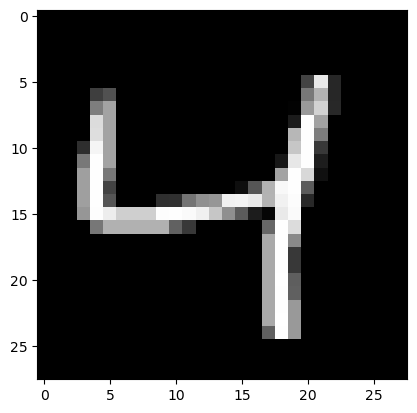

In [9]:
plt.imshow(x_train[2].reshape(28,28),cmap='gray')
plt.show()

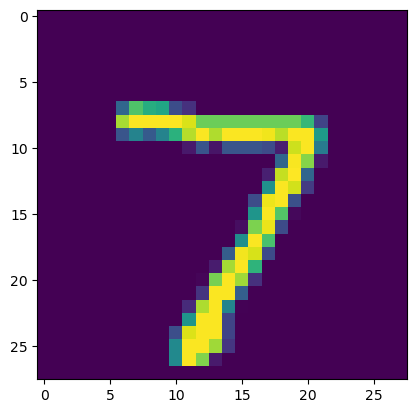

In [10]:
def show_me(X):
  plt.imshow(X.reshape(28,28))

show_me(x_test[0])

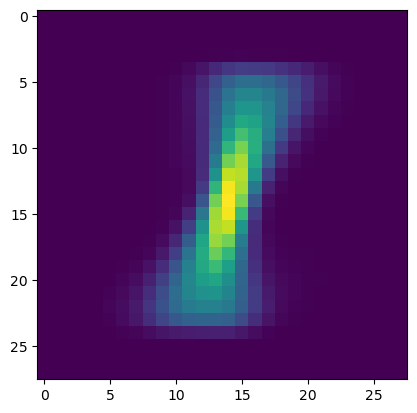

In [61]:
def show_me_all_mean(x_train,y_train,k):
  show_me(sum(x_train[y_train==k, :]/len(x_train[y_train==k,:])))

show_me_all_mean(x_train, y_train, k=1)

# Using the GausNB Model

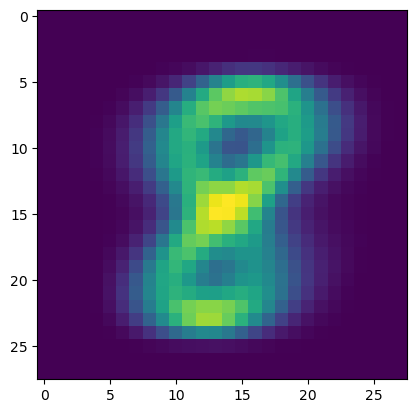

In [62]:
def show_me_all_mean(x_train,y_train,k):
  show_me(sum(x_train[y_train==k, :]/len(x_train[y_train==k,:])))

show_me_all_mean(x_train, y_train, k=8)

In [52]:
from scipy.stats import multivariate_normal as mvn

In [56]:
class GausNB():
  def fit(self,X,y,epsilon=1e-2):
    self.likelihoods=dict()
    self.priors=dict()
    self.K=set(y.astype(int))
    for k in self.K:
      X_k=X[y==k,:]
      self.likelihoods[k]={"mean":X_k.mean(axis=0),"cov":X_k.var(axis=0)+ epsilon}
      self.priors[k]=len(X_k)/len(X)
    return self

  def predict(self, X):
    N,D =X.shape
    P_hat=np.zeros((N,len(self.K)))

    for k,l in self.likelihoods.items():
      P_hat[:,k]=mvn.logpdf(X,l['mean'],l['cov'])+np.log(self.priors[k])
    return P_hat.argmax(axis=1)

    

In [57]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

# Fit and Prediction Using Test for GausNB ()   Before Scaled

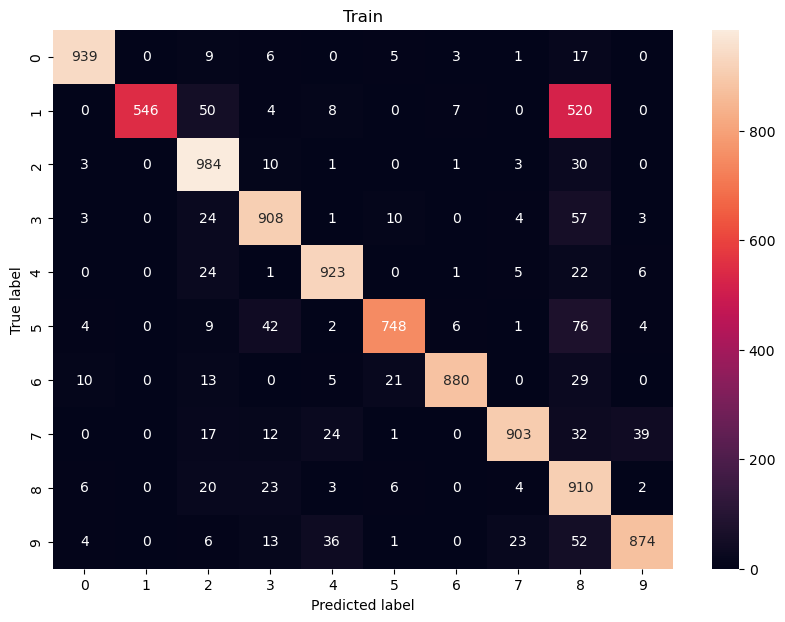

****************************************************************************************************
Train accuracy before Scaled 65.52
10000 10000


In [58]:
nb_model1=GausNB()
nb_model1.fit(x_train,y_train)  #TRaining model....
y_hat = nb_model.predict(x_test)  #prediction

y_actu0 = pd.Series(y_test, name='Actual').to_numpy() #Doubt
y_pred0 = pd.Series(y_hat, name='Predicted').to_numpy()
cm = pd.crosstab(y_actu, y_pred)

plt.figure(figsize=(10,7))
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.title('Train')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('*'*100)
print(f'Train accuracy before Scaled {accuracy(y_actu0,y_pred0)*100}')
print(len(y_actu0),len(y_pred0))

# Perform manual min-max scaling (min=0, max=255)

In [59]:

x_train_scaled = (x_train - 0) / (255 - 0)
x_test_scaled = (x_test - 0) / (255 - 0)

# Fit and Prediction Using Test for GausNB ()---->Scaled

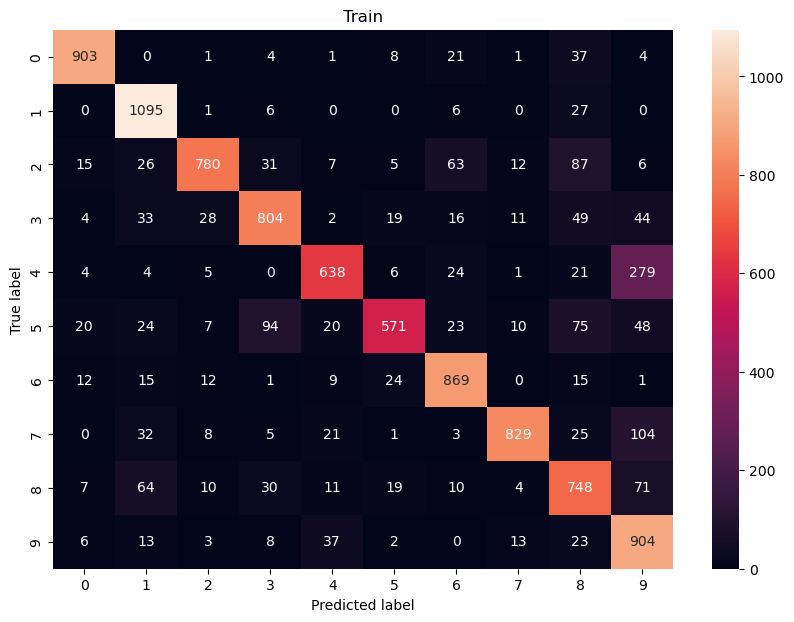

****************************************************************************************************
Train accuracy 81.41000000000001
10000 10000


In [60]:
nb_model=GausNB()
nb_model.fit(x_train_scaled,y_train)  #TRaining model....
y_hat = nb_model.predict(x_test_scaled)  #prediction

y_actu = pd.Series(y_test, name='Actual').to_numpy() #Doubt
y_pred = pd.Series(y_hat, name='Predicted').to_numpy()
cm = pd.crosstab(y_actu, y_pred)

plt.figure(figsize=(10,7))
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.title('Train')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('*'*100)
print(f'Train accuracy {accuracy(y_actu,y_pred)*100}')
print(len(y_actu),len(y_pred))

# Fit and Prediction Using Test dataset using non GausNB()

In [49]:
class gaus_non_nb():
  def fit(self,X,y,epsilon=1e-3):
    self.likelihoods=dict()
    self.priors=dict()
    self.K=set(y.astype(int))
    for k in self.K:
      X_k=X[y==k,:]
      N_k,D=X_k.shape
      mu_k=X_k.mean(axis=0)
      self.likelihoods[k]={"mean":X_k.mean(axis=0),"cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k]=len(X_k)/len(X)
    return self

  def predict(self, X):
    N,D =X.shape
    P_hat=np.zeros((N,len(self.K)))

    for k,l in self.likelihoods.items():
      P_hat[:,k]=mvn.logpdf(X,l['mean'],l['cov'])+np.log(self.priors[k])
    return P_hat.argmax(axis=1)


In [50]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

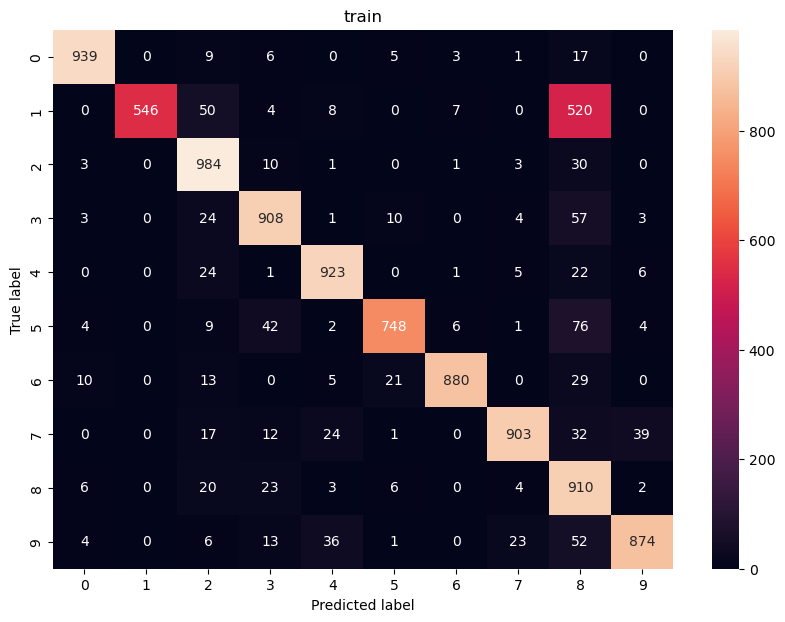

****************************************************************************************************
Train accuracy 86.15


In [51]:
nonnb_model=gaus_non_nb()
nonnb_model.fit(x_train_scaled,y_train)
prediction=nonnb_model.predict(x_test)

y_actu = pd.Series(y_test, name='Actual').to_numpy()
y_pred = pd.Series(prediction, name='Predicted').to_numpy()
cm = pd.crosstab(y_actu, y_pred)

plt.figure(figsize=(10,7))
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.title('train')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('*'*100)
print(f'Train accuracy {accuracy(y_actu,y_pred)*100}')

# KNN Implemetation

In [33]:
class KNNCLassifier():
  def fit(self,X,y):
    self.X=X
    self.y=y

  def predict(self, X, K, epsilon= 1e-3):
    N= len(X)
    y_hat=np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis=1)
      idxt=np.argsort(dist2)[:K]
      gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))

      y_hat[i]=np.bincount(self.y[idxt],weights=gamma_k).argmax()

    return y_hat

In [34]:
knn_instance = KNNCLassifier()
knn_instance.fit(x_train,y_train)
y_hat=knn_instance.predict(x_test,K=5)

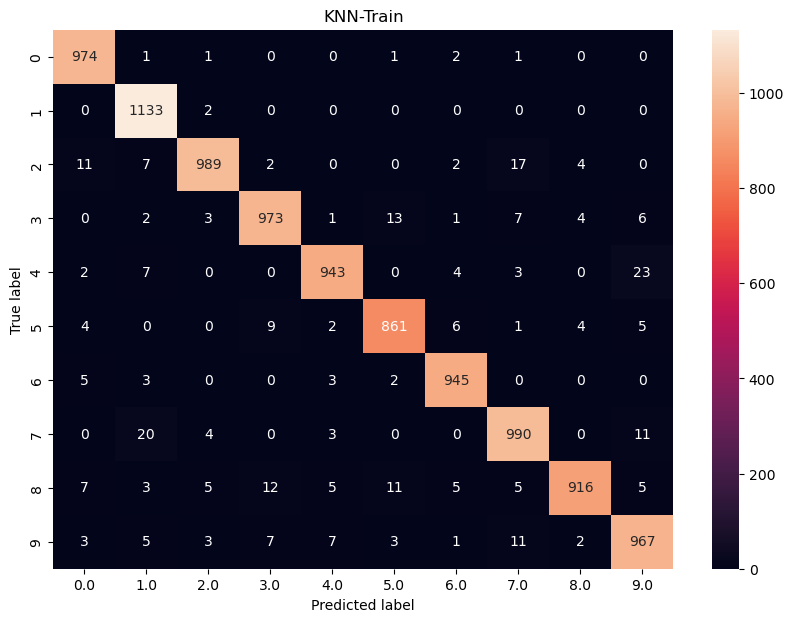

****************************************************************************************************
Accuracy 96.91


In [36]:
y_actu1 = pd.Series(y_test, name='Actual').to_numpy()
y_pred1 = pd.Series(y_hat, name='Predicted').to_numpy()
cm = pd.crosstab(y_actu1, y_pred1)

plt.figure(figsize=(10,7))
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.title('KNN-Train')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('*'*100)
print(f'Accuracy {accuracy(y_actu1,y_pred1)*100}')


